In [1]:
import pandas as pd
from libmlops.data.data_loading import explore_dataset

data = []
# Create lists for x, y, and z
for x in range(13):
    for y in range(13):
        data.append([x, y, x * y])

# Create a DataFrame from the dictionary
dataset = pd.DataFrame(data, columns=["x", "y", "z"])
for i in range(2):
    dataset = pd.concat([dataset, dataset.copy()], ignore_index=True)

# explore_dataset(dataset, show_ui=True)
dataset

,x,y,z
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0
...,...,...,...
671,12,8,96
672,12,9,108
673,12,10,120
674,12,11,132


In [2]:
from libmlops.data.data_preprocessing import get_xy
from libmlops.features.feature_selection import convert_indices
from libmlops.utils.regressor_evaluation import features_evaluation
from libmlops.utils.features_evaluation import keep_features

X, Y = get_xy(dataset)
features = features_evaluation(X, Y, verbose=True)
features = convert_indices(dataset, features)
print(features)
dataset_reduced = keep_features(dataset, features)

dataset_reduced.head()

LINR [1] [0. 1.]
RDG [1] [0. 1.]
LSO [0] [1. 0.]
ELN [1] [0. 1.]
DTR [1] [0. 1.]
RFR [1] [0. 1.]
SVR [0] [1. 0.]
KNR [1] [0. 1.]
GBR [1] [0. 1.]
[1, 0]
['x', 'y']


,x,y
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [3]:
from numpy import set_printoptions
from libmlops.features.feature_evaluation import (
    get_feature_importance,
    get_k_best_features,
    get_recursive_feature_elimination,
    get_linear_regression,
    get_decision_tree,
)

set_printoptions(precision=2)
print("get_feature_importance", get_feature_importance(X, Y, verbose=False))
print("get_k_best_features", get_k_best_features(X, Y, verbose=False))
# print(
#     "get_recursive_feature_elimination",
#     get_recursive_feature_elimination(X, Y, verbose=False),
# )
print("get_linear_regression", get_linear_regression(X, Y, verbose=False))
print("get_decision_tree", get_decision_tree(X, Y, verbose=False))

get_feature_importance [0. 1.]
get_k_best_features [0. 0.]
get_linear_regression [1. 0.]
get_decision_tree [1. 0.]


LINR: 0.832229 (0.023912)
RDG: 0.832231 (0.023903)
LSO: 0.832281 (0.023080)
ELN: 0.831471 (0.021440)
DTR: 1.000000 (0.000000)
RFR: 0.999928 (0.000041)
SVR: 0.819267 (0.018056)
KNR: 0.993028 (0.001334)
GBR: 0.999197 (0.000247)


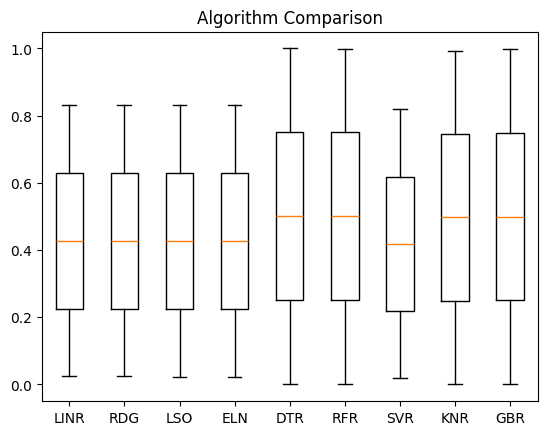

In [4]:
from libmlops.utils.regressor_evaluation import (
    algorithm_evaluation,
    compare_algorithms,
)

X = dataset_reduced
Y = dataset[["z"]]
results, names = algorithm_evaluation(X, Y, verbose=True)
compare_algorithms(results, names)

In [5]:
from libmlops.data.data_loading import save_datasets
from libmlops.data.data_preprocessing import split_train_test_xy


X_train, X_validation, Y_train, Y_validation = split_train_test_xy(X, Y, random_state=1)
save_datasets(
    [X_train, X_validation, Y_train, Y_validation],
    ["X_train", "X_validation", "Y_train", "Y_validation"],
    save_path="../data/processed",
)

In [8]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from libmlops.data.data_loading import load_datasets
from libmlops.models.model_loading import load_models, save_models
from libmlops.models.model_training import train_model


LOAD_MODEL = False
print("Loading training datasets")
[X_train, Y_train] = load_datasets(
    ["X_train", "Y_train"], save_path="../data/processed/"
)
model = []
model_name = "finalised_model"
if LOAD_MODEL:
    print("Loading previous model")
    [model] = load_models(model_name, save_path="../data/processed/")
if model == []:
    print("Does not exist - creating new model")
    # model = RandomForestRegressor(n_jobs=-1)
    # model = GradientBoostingRegressor()
    model = DecisionTreeRegressor()
    # model = KNeighborsRegressor(n_jobs=-1)
    print("Saving model")
    save_models(model, model_name, save_path="../data/processed/")

print("Training model")
train_model(model, X_train, Y_train.values.ravel())
print("Saving model")
save_models(model, model_name, save_path="../data/processed/")

Loading training datasets
Does not exist - creating new model
Saving model
Training model
Saving model


In [9]:
from libmlops.data.data_loading import load_datasets
from libmlops.models.model_loading import load_models
from libmlops.utils.regressor_evaluation import model_evaluation

print("Loading validation datasets")
[X_validation, Y_validation] = load_datasets(
    ["X_validation", "Y_validation"], save_path="../data/processed/"
)

print("Loading previous model")
model_name = "finalised_model"
[model] = load_models(model_name, save_path="../data/processed/")

print("Evaluating model")
r2, mae, cv_results_mean, cv_results_std = model_evaluation(
    model, X_validation, Y_validation
)
print("R-squared (coefficient of determination) regression score: ", r2)
print("Mean Absolute Error:", mae)
print("Cross-validation: %f Mean (%f Standard)" % (cv_results_mean, cv_results_std))

Loading validation datasets
Loading previous model
Evaluating model
R-squared (coefficient of determination) regression score:  1.0
Mean Absolute Error: 0.0
Cross-validation: 0.957038 Mean (0.035856 Standard)


In [10]:
import pandas as pd

print("Loading previous model")
model_name = "finalised_model"
[model] = load_models(model_name, save_path="../data/processed/")

names = [
    "x",
    "y",
]
data = [[1, 1], [2, 2], [4, 4], [8, 8], [12, 12]]

df = pd.DataFrame(data, columns=names)

df

Loading previous model


,x,y
0,1,1
1,2,2
2,4,4
3,8,8
4,12,12


In [11]:
for index, row in df.iterrows():
    # test the model with 1 row
    print(
        index, row.values, model.predict(pd.DataFrame([row.values], columns=row.index))
    )

0 [1 1] [1.]
1 [2 2] [4.]
2 [4 4] [16.]
3 [8 8] [64.]
4 [12 12] [144.]
